In [16]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# generate random number
rng = np.random.default_rng(42)

In [10]:
# Generate a simple synthetic dataset
n = 300
df = pd.DataFrame({
    "age": rng.integers(18, 70, size=n),
    "income": rng.normal(60000, 15000, size=n).clip(15000, 150000),
    "spend_score": rng.normal(50, 15, size=n).clip(0, 100),
    "gender": rng.choice(["Male", "Female"], size=n, p=[0.6, 0.4]),
    "is_member": rng.choice([0, 1], size=n, p=[0.7, 0.3])
})

In [7]:
# Add a simple relationship and a few missing values
df["spend_score"] = (
    0.0006 * df["income"] - 0.15 * df["age"] + rng.normal(0, 10, size=n) + 40
).clip(0, 100)
df.loc[rng.choice(df.index, 5, replace=False), "income"] = np.nan
df.loc[rng.choice(df.index, 5, replace=False), "gender"] = np.nan

In [37]:
# Quick data inspection
df.head()

,age,income,spend_score,gender,is_member
0,19,71578.114386,39.536642,Female,0
1,41,55804.847533,37.010902,Male,0
2,59,52319.078710,25.287556,Female,0
3,67,81013.227905,54.360998,Female,1
4,31,44290.692804,44.681187,Female,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          300 non-null    int64  
 1   income       300 non-null    float64
 2   spend_score  300 non-null    float64
 3   gender       300 non-null    object 
 4   is_member    300 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 11.8+ KB


In [43]:
df.describe()

,age,income,spend_score,is_member
count,300.000000,300.000000,300.000000,300.000000
mean,41.786667,60715.356659,50.539315,0.273333
std,15.193550,15331.833781,15.200235,0.446415
min,18.000000,15000.000000,14.417067,0.000000
25%,29.750000,50741.085476,40.076714,0.000000
50%,40.000000,61142.494041,50.023045,0.000000
75%,55.000000,70053.040086,61.877483,1.000000
max,69.000000,102189.738724,89.054394,1.000000


In [46]:
# Missing values
print("\nMissing values per column:")
print(df.isna().sum())



Missing values per column:
age            0
income         0
spend_score    0
gender         0
is_member      0
dtype: int64


In [49]:
# Example: simple imputation for income (median)
df["income"] = df["income"].fillna(df["income"].median())
# Example: fill missing gender with "Unknown"
df["gender"] = df["gender"].fillna("Unknown")

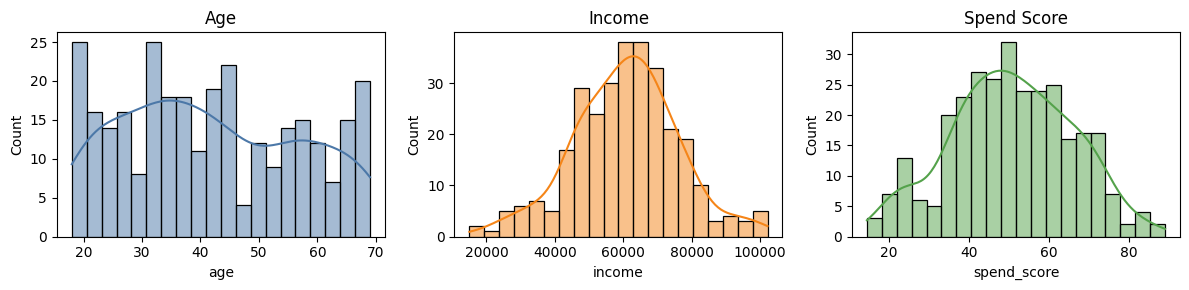

In [58]:
# Basic distributions
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
sns.histplot(df["age"], kde=True, bins=20, color="#4C78A8")
plt.title("Age")

plt.subplot(1, 3, 2)
sns.histplot(df["income"], kde=True, bins=20, color="#F58518")
plt.title("Income")

plt.subplot(1, 3, 3)
sns.histplot(df["spend_score"], kde=True, bins=20, color="#54A24B")
plt.title("Spend Score")

plt.tight_layout()
plt.show()

In [ ]:
# Categorical summary
print("\nGender counts:")
print(df["gender"].value_counts(dropna=False))
print("\nIs_member rate:")
print(df["is_member"].mean())

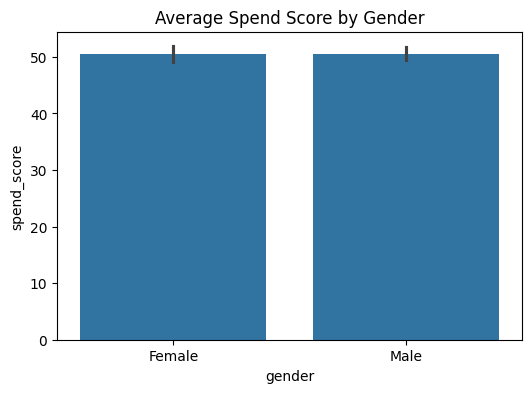

In [61]:
# Bar plot for categorical vs numeric
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="gender", y="spend_score", estimator=np.mean, errorbar="se")
plt.title("Average Spend Score by Gender")
plt.show()

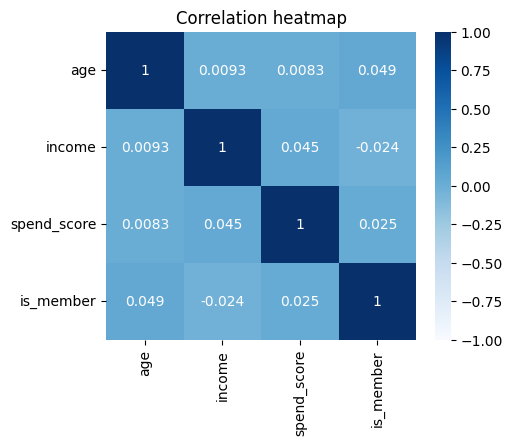

In [67]:
# 7) Relationships
# Correlation heatmap for numeric features
plt.figure(figsize=(5, 4))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.title("Correlation heatmap")
plt.show()

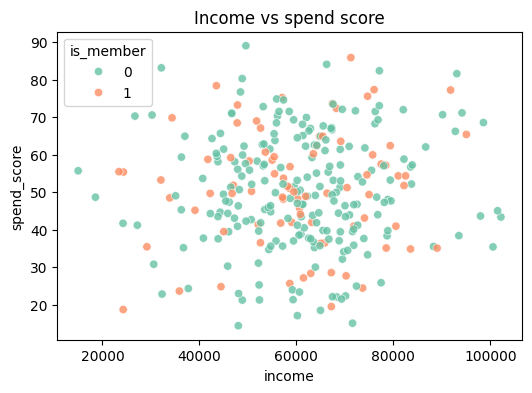

In [76]:
# Scatter: income vs spend_score
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="income", y="spend_score", hue="is_member", palette="Set2", alpha=0.8)
plt.title("Income vs spend score")
plt.show()

In [73]:
# Simple group analysis
grp = df.groupby("is_member").agg(
    age_mean=("age", "mean"),
    income_mean=("income", "mean"),
    spend_mean=("spend_score", "mean"),
    n=("is_member", "size")
)
print("\nGroup summary by is_member:")
print(grp)


Group summary by is_member:
            age_mean   income_mean  spend_mean    n
is_member                                          
0          41.334862  60937.638658   50.310392  218
1          42.987805  60124.411830   51.147916   82


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=524a81cf-7a4c-492c-be20-408cca8fd75b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>